# Melio Data Scientist Technical Interview

## Problem Background

You received a dataset from your client containing a list of names and their potential classifications.

The classifications are generated by an upstream system, but it is not always correct. 

Your task is to correctly classify the names and critically evaluate your solution.

#### Task 1: Correctly classify the names

Determine whether the name belongs to a `Person`, `Company`, or `University`:

  - You can use any library you want.
  - You can use a rule-based classification, a pre-built model/embedding, build a model yourself or a hybrid. 
  - You can keep everything in the Jupyter Notebook, write everything in a python script, or a combination of the above.
    
#### Task 2: Crtically evaluate your solution

Write a summary on the following:

  - Your exploratory data analysis.
  - What is the potential issue with your system, and how would you resolve it?
  - How would you deploy this solution in real life (you can assume anything you want to simplify the analysis, but state these assumptions).

## Submission Requirements

  1. Give enough information on how to run your solution (i.e. python version, packages, requirements.txt, Dockerfile, etc.).
  2. State all of your assumptions, if any.
  3. There is no right or wrong answer, but give a clear reasoning on each step you took. 


<div class="panel panel-success" style="border-radius:0.8em">
    <div class="panel-heading" align="center">
        <span style="font-size:2em">Melio.ai</span> <br>
        <b>Data Discovery and Machine Inteligence</b>
    </div>
    <div class="panel-body" style="font-size:2.2em" align="center">
        Name Classifier
    </div>
</div>

<div class="alert alert-success" style="font-size:2em; border-radius:0.5em">
    Import Libraries
</div>

In [1]:
# Fundamentals
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter
from IPython.display import Latex

# Natural Language Processing
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer

# Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

# Import Tf-idf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import the Label Encoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

# Import the train test split
from sklearn.model_selection import train_test_split

# To evaluate our model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics

[nltk_data] Downloading package punkt to /Users/chuene/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chuene/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<div class="alert alert-success" style="font-size:2em; border-radius:0.5em">
    Load Data
</div>

In [2]:
df = pd.read_csv('data/names_data_candidate.csv')

<div class="alert alert-success" style="font-size:2em; border-radius:0.5em">
    Exploratory Data Analysis
</div>

In [3]:
# Display firt five rows
display(df.head())

# Display the summary statistics
display(df.describe())

# Print the info
print(df.info())

,dirty_name,dirty_label
0,Wright Pentlow,Person
1,MS Sydney Hadebe,Person
2,PROF. HENNIE VORSTER,Person
3,ENRICA HAYTER,Person
4,Teboho Ngema,Person


,dirty_name,dirty_label
count,4520,4520
unique,4519,3
top,Universidad Católica Anselmo Llorente,Person
freq,2,3690


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   dirty_name   4520 non-null   object
 1   dirty_label  4520 non-null   object
dtypes: object(2)
memory usage: 70.8+ KB
None


In [4]:
# convert all words to lower case
df.dirty_name = df.dirty_name.apply(lambda x: x.lower())

In [5]:
# Check for differnt labels
pd.unique(df.dirty_label)

array(['Person', 'Company', 'University'], dtype=object)

In [6]:
# How many words do we have per each dirty_labels?

person = df[df.dirty_label== 'Person']
company = df[df.dirty_label== 'Company']
university = df[df.dirty_label== 'University']

person.shape, university.shape, company.shape

((3690, 2), (98, 2), (732, 2))

Person        3690
Company        732
University      98
Name: dirty_label, dtype: int64
Person        0.816372
Company       0.161947
University    0.021681
Name: dirty_label, dtype: float64


/Users/chuene/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


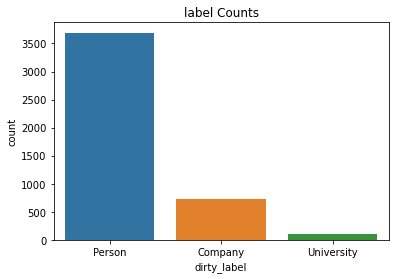

In [7]:
# Check how dirty_labels are distributed

# Print the counts of each labels
print(df['dirty_label'].value_counts())

# Print the proportions of each labels
print(df['dirty_label'].value_counts(normalize=True))

# Visualize the labels
sns.countplot(df['dirty_label'])
plt.title("label Counts")
plt.show()

In [8]:
# How many words do we have per each dirty_labels?

person = df[df.dirty_label== 'Person']
company = df[df.dirty_label== 'Company']
university = df[df.dirty_label== 'University']

/Users/chuene/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chuene/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chuene/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

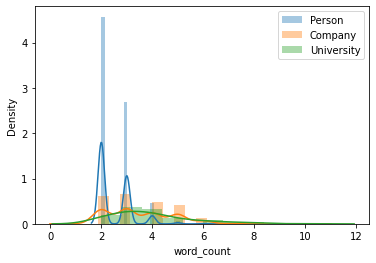

In [9]:
# Store the number of words in each names
df['word_count'] = df['dirty_name'].str.split().str.len()


# Visualize the distribution of word counts in each label
sns.distplot(df[df['dirty_label']=='Person']['word_count'], label='Person')
sns.distplot(df[df['dirty_label']=='Company']['word_count'], label='Company'),
sns.distplot(df[df['dirty_label']=='University']['word_count'], label='University'),
plt.legend()
plt.show()

<div class="alert alert-success" style="font-size:2em; border-radius:0.5em">
    Data Preprocessing
</div>

In [10]:
# create a function to count words

def word_count_fun(dictionary):
    list_vec = list(dictionary.keys())
    full_list = []
    for x in list_vec:
        x1 = x.split()
        for x2 in x1:
            full_list.append(x2)
    return  full_list

In [11]:
# create dataframes for person, company, university

vectorizer_per = dict(Counter(person.dirty_name.to_list()))
vectorizer_com = dict(Counter(company.dirty_name.to_list()))
vectorizer_uni = dict(Counter(university.dirty_name.to_list()))

count_per =pd.DataFrame(list(dict(Counter(word_count_fun(vectorizer_per))).items()),columns = ['names','counting'])\
                                    .sort_values("counting", ascending=False)

count_com =pd.DataFrame(list(dict(Counter(word_count_fun(vectorizer_com))).items()),columns = ['names','counting'])\
                                    .sort_values("counting", ascending=False)

count_uni =pd.DataFrame(list(dict(Counter(word_count_fun(vectorizer_uni))).items()),columns = ['names','counting'])\
                                    .sort_values("counting", ascending=False)

In [12]:
# Here I created this manually, to verify the labels.
# So later I create a mapping fuction using these lists as my inputs

university_list = ['université', 'university', 'universitas', 'universitaria', 'universidade', 'universidad',\
                   'tecnológica', 'technology','science', 'school', "medicine",'instituto', 'institute',
                  "health", 'educativas', 'education', 'academy']
company_list = ['ltd', 'pty', 'pl', 'co.', 'cc', 'ltd.', 'limited', 'gmbh','trust', 'co', 'fund', '(pty)', \
                'group', 'family', 'inc.','company', 'consortium','inc', 'c.c.', 'limited.', 'unltd', 'cc.', \
                'llc.', 'corp.', 'funds', 'pllc.', 'services', 'partnership', 'corp', '(ltd).', 'trading',\
               "proprietary", 'lda.', 'lda', 'investments', 'trudoo', '(ltd)', 'capital',  'associates', \
                "sicav", 'plc.', 'plc', 'incorporated', 'l.l.p',]

person_list = ['miss', 'dr.', 'prof.', 'dr', 'mr.', 'mr', 'mrs', 'mrs.', 'van','hon.', 'rev.', 'ms', 'sr.', \
               'ms.']

In [13]:
# create a map function to verify the labels of dirty_label

def mapping_func(dirtyname):
    return_value = ''
    for i in dirtyname.split():
        if i in university_list:
            return_value =  "University"
            break
        elif i in company_list:
            return_value = "Company"
            break
        elif not return_value:
            return_value = "Person"
        
    return return_value

In [14]:
# Create a new column, semi clean label
df["semi_clean_label"] = df.dirty_name.apply(mapping_func)

<div class="alert alert-success" style="font-size:2em; border-radius:0.5em">
    Splitting Data
</div>

In [15]:
# Select the features and the label for dirty label
X = df['dirty_name']
y = df['dirty_label']

In [16]:
# Select the features and the label for semi clean label
X_ = df['dirty_name']
y_ = df['semi_clean_label']

In [17]:
# Split the data for the dirty label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

In [18]:
# Split the data for the semi clean label
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, random_state=34)

In [19]:
# Create the tf-idf vectorizer
vectorizer = TfidfVectorizer()

# First fit the vectorizer with our training set
tfidf_train = vectorizer.fit_transform(X_train)

# Now we can fit our tes(dirty label)t data with the same vectorizer
tfidf_test = vectorizer.transform(X_test)

# We also fit our  test(semi clean label) with the vectorizer
tfidf_test_ = vectorizer.transform(y_test_)

<div class="alert alert-success" style="font-size:2em; border-radius:0.5em">
    Build Model
</div>

In [20]:
#Talk about Bayes theorem 

In [21]:
# Initialize the Multinomial Naive Bayes classifier
model_naive_bayes = MultinomialNB()

# Fit the model using the dirty label y_train 
model_naive_bayes.fit(tfidf_train, y_train)

# Print the accuracy score
print("Accuracy:", model_naive_bayes.score(tfidf_test, y_test))

Accuracy: 0.9126106194690266


<div class="alert alert-success" style="font-size:2em; border-radius:0.5em">
   Evaluate Model
</div>

In [22]:
# Predict using the semi clean label
y_pred = model_naive_bayes.predict(tfidf_test_)

# Print the Confusion Matrix
cm = confusion_matrix(y_test_, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test_, y_pred)
print("\n\nClassification Report\n")
print(cr)

# Print the Receiver operating characteristic Auc score
#auc_score = roc_auc_score(y_test, y_pred, multi_class='ovr')
accuracy = accuracy_score(y_test_, y_pred)
print("Accuracy Score:",accuracy)

Confusion Matrix

[[ 88   0   0]
 [  0 801   0]
 [  0   0  15]]


Classification Report

              precision    recall  f1-score   support

     Company       1.00      1.00      1.00        88
      Person       1.00      1.00      1.00       801
  University       1.00      1.00      1.00        15

    accuracy                           1.00       904
   macro avg       1.00      1.00      1.00       904
weighted avg       1.00      1.00      1.00       904

Accuracy Score: 1.0


In [23]:
# Function for calculating roc_auc_score for multi-class 
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred,)

In [24]:
# We calculate the auc for the semi clean label
multiclass_roc_auc_score(y_test_, y_pred)

1.0

<div class="alert alert-success" style="font-size:2em; border-radius:0.5em">
    Save Model
</div>

In [25]:
import pickle
# open a file, where you ant to store the data
file = open('Naive_Bayes_Classifier.pkl', 'wb')

# dump information to that file
pickle.dump(model_naive_bayes, file)
file.close()

In [26]:
# Load the model
model = pickle.load(open('Naive_Bayes_Classifier.pkl', 'rb'))

In [27]:
model

MultinomialNB()

In [28]:
# Testing Model

In [33]:
#model_naive_bayes.predict(tfidf_test)

In [30]:
test = vectorizer.transform(['investments'])

In [31]:
model_naive_bayes.predict(test)

array(['Company'], dtype='<U10')

<div class="alert alert-success" style="font-size:2em; border-radius:0.5em">
    Conclusion !
</div>

- Naive Bayes generalises when we have a good prior distribution.

 